In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")
# from hps_baseline.greggdataset_loader import load_data, v_key, s_key
from hps_baseline.opensource_loader import load_data, v_key, s_key
from scipy.ndimage import gaussian_filter1d
data = load_data(vk="1.0", sk="0",m=70)

q_k = gaussian_filter1d(data[0],2)
t_k = gaussian_filter1d(data[1],2)
q_a = gaussian_filter1d(data[2],2)
t_a = gaussian_filter1d(data[3],2)
idx = np.arange(q_k.shape[0])



In [2]:
def cal_gait_division():
    gait_divisions = []
    idx_max_qa = np.argmax(q_a)
    max_qa = np.max(q_a)
    qa_threshold = max_qa-1
    gait_divisions.append([0, np.where(q_a[:idx_max_qa]>qa_threshold)[0][0]])
    idx_max_ta = np.argmax(t_a)
    max_ta = np.max(t_a)
    ta_threshold = max_ta*1/5
    gait_divisions.append([gait_divisions[-1][1], np.where(t_a[idx_max_ta:80]<ta_threshold)[0][0]+idx_max_ta])
    gait_divisions.append([gait_divisions[-1][1], np.argmax(q_k)])
    gait_divisions.append([gait_divisions[-1][1], idx[-1]])
    return gait_divisions

gait_division = cal_gait_division()

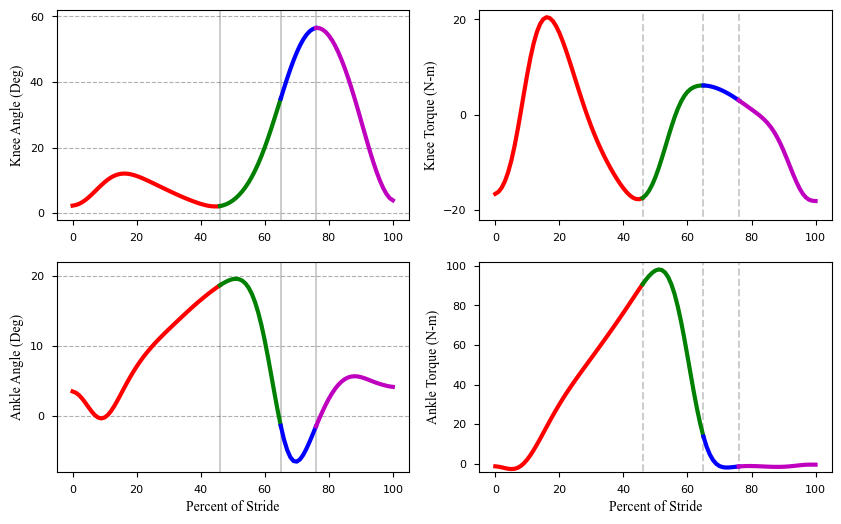

In [3]:
plt.style.use('seaborn-v0_8-paper')
# plt.rc('font',family='Times New Roman') 
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

color_list = ["r","g","b","m"]

ax1.plot(idx, q_k)
ax1.set_ylim([-2,62])
ax1.set_yticks(np.arange(0,61,20))
ax1.grid(axis='y', linestyle='--')
ax1.set_ylabel('Knee Angle (Deg)', fontdict={'family' : 'Times New Roman', 'size': 10})


ax2.plot(idx, t_k)
ax2.set_ylim([-22,22])
ax2.set_yticks(np.arange(-20,21,20))
ax2.set_ylabel('Knee Torque (N-m)', fontdict={'family' : 'Times New Roman', 'size': 10})

ax3.plot(idx, q_a)
ax3.set_ylim([-8,22])
ax3.set_yticks(np.arange(0,21,10))
ax3.grid(axis='y', linestyle='--')
ax3.set_ylabel('Ankle Angle (Deg)', fontdict={'family' : 'Times New Roman', 'size': 10})
ax3.set_xlabel('Percent of Stride', fontdict={'family' : 'Times New Roman', 'size': 10})

ax4.plot(idx, t_a)
ax4.set_ylim([-4,102])
ax4.set_yticks(np.arange(0,101,20))
ax4.set_ylabel('Ankle Torque (N-m)', fontdict={'family' : 'Times New Roman', 'size': 10})
ax4.set_xlabel('Percent of Stride', fontdict={'family' : 'Times New Roman', 'size': 10})


def plot_gait_division(phase):
    if phase == 3:
        pass
    else:
        line_y = np.arange(-30,120,10)
        line_x = np.ones_like(line_y)*gait_division[phase][1]
        ax1.plot(line_x, line_y, color='black', linestyle='-',alpha=0.2)
        ax2.plot(line_x, line_y, color='black', linestyle='--',alpha=0.2)
        ax3.plot(line_x, line_y, color='black', linestyle='-',alpha=0.2)
        ax4.plot(line_x, line_y, color='black', linestyle='--',alpha=0.2)
    idx = np.arange(gait_division[phase][0], gait_division[phase][1]+1)
    ax1.plot(idx, q_k[idx], color=color_list[phase],linewidth=3)
    ax2.plot(idx, t_k[idx], color=color_list[phase],linewidth=3)
    ax3.plot(idx, q_a[idx], color=color_list[phase],linewidth=3)
    ax4.plot(idx, t_a[idx], color=color_list[phase],linewidth=3)


plot_gait_division(0)
plot_gait_division(1)
plot_gait_division(2)
plot_gait_division(3)
plt.savefig("../image/gait_division.png")
plt.show(block=False)